## TODO: 
- DETECT "Item_Outlet_Sales" based on the given data
- The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out *the sales of each product at a particular store*.

- Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### Store Level Hypotheses:

- City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
- Population Density: Stores located in densely populated areas should have higher sales because of more demand.
- Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
- Competitors: Stores having similar establishments nearby should have less sales because of more competition.
- Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
- Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
- Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
- Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

### Product Level Hypotheses:

- Brand: Branded products should have higher sales because of higher trust in the customer.
- Packaging: Products with good packaging can attract customers and sell more.
- Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
- Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
- Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
- Advertising: Better advertising of products in the store will should higher sales in most cases.
- Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

In [ ]:
[Highlight assumption](https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20)

[Highlight assumption](https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20)

![Bilby Stampede](http://example.com/images/logo.png)

[Image](#https://www.analyticsvidhya.com/wp-content/uploads/2016/02/0.-data-dictionary-1.png)

## Project #1: Bigmart Sale Prediction

<a id = "#initialization"></a>
<h2>Initializing Packages and Importing Data</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
!ls ../input/bigmart-sales-data
train = pd.read_csv("../input/bigmart-sales-data/Train.csv") 
test = pd.read_csv("../input/bigmart-sales-data/Test.csv") 

Test.csv  Train.csv


<a id = "#viewdata"></a>
<h2>Taking a peak at our data</h2>

In [2]:
train.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
train[]

In [ ]:
train.info()

In [ ]:
## Missing fields:
- Item_Weight: Could be detected based on similar Item_Type, Item_MRP or just left alone as it doesn't matter
- Outlet_Size: Meaning that the outlet_size for given items are missed. It could be detected based on similar Outlet_Identifier, Outlet_Type, Outlet_Location_Type

In [ ]:
train.loc[train["Item_Identifier"] == "NCD19"]

## Missing fields:
- Item_Weight: Could be detected based on similar Item_Type, Item_MRP or just left alone as it doesn't matter
- Outlet_Size: Meaning that the outlet_size for given items are missed. It could be detected based on similar Outlet_Identifier, Outlet_Type, Outlet_Location_Type

In [3]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#Check for duplicates
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

In [ ]:
train["Item_Cat_Visibility"] = train["Item_Visibility"] * train["Item_Outlet_Sales"]

<h2>1. Exploratory Data Analysis (EDA)</h2>
<h3>1.1. Univariate Distribution</h3>
<h4>1.1.1.  Distribution of the target variable : Item_Outlet_Sales</h4>

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

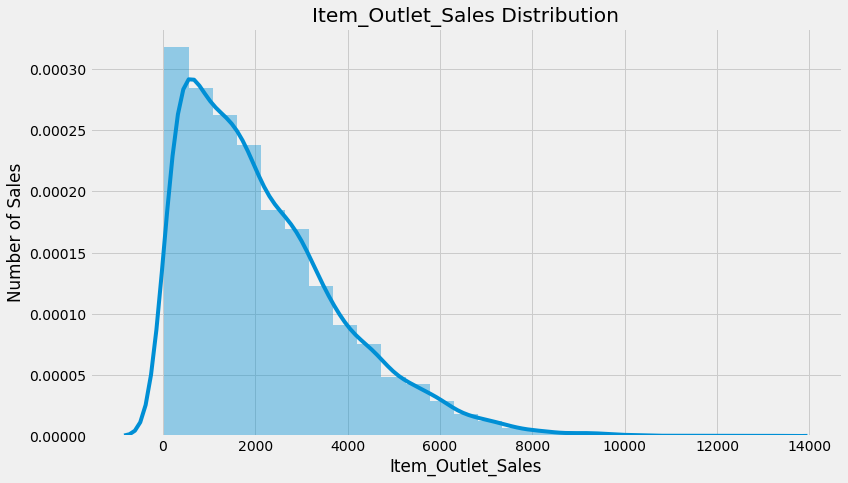

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")


In [ ]:
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

<h4>1.1.2. Numerical Variables</h4>


In [5]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [ ]:
numeric_features.corr()

In [ ]:
corr = numeric_features.corr()

print (corr['Item_Outlet_Sales'].sort_values(ascending=False))

In [ ]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

<h4>1.1.3. Categorical Variables</h4>
<h5>1.1.3.1. Distribution of the Item_Fat_Content</h5>

In [6]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

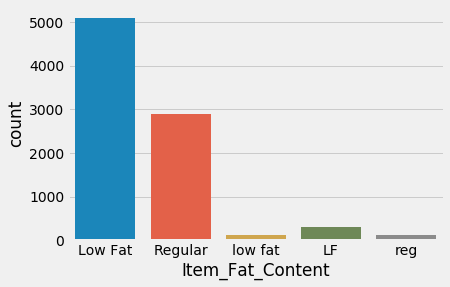

In [7]:
sns.countplot(train.Item_Fat_Content)


<h5>1.1.3.2. Distribution of the Item_Type</h5>

In [ ]:
train.Item_Type.value_counts()

In [ ]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

<h5>1.1.3.3. Distribution of the Outlet_Size</h5>

In [ ]:
train.Outlet_Size.value_counts()

In [ ]:
sns.countplot(train.Outlet_Size)

<h5>1.1.3.4. Distribution of the Outlet_Location_Type</h5>

In [ ]:
train.Outlet_Location_Type.value_counts()

In [ ]:
sns.countplot(train.Outlet_Location_Type)

<h5>1.1.3.5. Distribution of the Outlet_Type</h5>

In [ ]:
train.Outlet_Type.value_counts()

In [ ]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

<h3>1.2. Bivariate Distribution</h3>
<h4>1.2.1. Numerical Variables</h4>
<h5>1.2.1.1. Item_Weight and Item_Outlet_Sales Analysis</h5>

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

<h5>1.2.1.2. Item_Visibility and Item_Outlet_Sales Analysis</h5>

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

<h5>1.2.1.3. Item_MRP and Item_Outlet_Sales Analysis</h5>

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_MRP and Item_Outlet_Sales Analysis")
plt.plot(train.Item_MRP, train["Item_Outlet_Sales"],'.', alpha = 0.3)

<h5>1.2.1.4. Outlet_Establishment_Year and Item_Outlet_Sales Analysis</h5>

In [ ]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<h4>1.2.2. Categorial Variables</h4>

In [ ]:
numeric_features = train.select_dtypes(include=[np.object])
numeric_features.dtypes

<h5>1.2.2.1. Impact of Item_Identifier on Item_Outlet_Sales</h5>

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Identifier")
plt.ylabel("SQRT Item_Outlet_Sales")
plt.title("Item_Identifier  and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Identifier , train["Item_Outlet_Sales"],'.', alpha = 0.3)

<h5>1.2.2.2. Impact of Item_Fat_Content on Item_Outlet_Sales</h5>

In [ ]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<h5>1.2.2.3. Impact of Outlet_Identifier on Item_Outlet_Sales</h5>

In [ ]:
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [ ]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

In [ ]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

<h5>1.2.2.4. Impact of Outlet_Size on Item_Outlet_Sales</h5>

In [ ]:
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Size ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<h5>1.2.2.5. Impact of Outlet_Location_Type on Item_Outlet_Sales</h5>

In [ ]:
Outlet_Location_Type_pivot = \
train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [ ]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

<h5>1.2.2.6. Impact of Outlet_Type on Item_Outlet_Sales</h5>

In [ ]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<h5>1.2.2.7. Impact of Item_Type on Item_Outlet_Sales</h5>

In [ ]:
pivoTable = \
train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

<h5>1.2.2.8. Impact of Item_Type vs Item_Visibility</h5>

In [ ]:
pivoTable = \
train.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Visibility")
plt.title("Item_Type vs Item_Visibility")
plt.xticks(rotation=90)
plt.show()

#### 1.3. Group outlets to find meaning

In [ ]:
Outlet_Identifier	Outlet_Establishment_Year	Outlet_Size	Outlet_Location_Type	Outlet_Type

Item_Identifier	Item_Weight	Item_Fat_Content	Item_Visibility	Item_Type	Item_MRP

In [ ]:

## https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
aggDict = {
    "Outlet_Establishment_Year": ["min", "max"],
    "Outlet_Size": ["min", "max"],
    "Outlet_Location_Type": ["min", "max"],
    "Outlet_Type": ["min", "max"],
    "Item_Visibility": ["sum"],
    "Item_Cat_Visibility": ["sum"],
    "Item_Identifier": ["count"],
    "Item_Outlet_Sales": ["sum"]
}
# dfOutlet = train.groupby("Outlet_Identifier", as_index=False).agg(aggDict)
dfOutlet = train.groupby("Outlet_Identifier").agg(aggDict)
# Using ravel, and a string join, we can create better names for the columns:
dfOutlet.columns = ["_".join(x) for x in dfOutlet.columns.ravel()]

In [ ]:
dfOutlet

In [ ]:
# Confirm that each outlet will rank 1 product 1 time, no duplicated
agg01 = {
    "Item_Identifier": ["count"],
    "Item_Outlet_Sales": ["sum"]
}
dfOutletProduct = train.groupby(["Outlet_Identifier", "Item_Identifier"]).agg(agg01)
dfOutletProduct.columns = ["_".join(x) for x in dfOutletProduct.columns.ravel()]

In [ ]:
dfOutletProduct[["Item_Identifier_count"]].max()

In [ ]:
# Check outlet on test
agg02 = {
    "Outlet_Establishment_Year": ["min", "max"],
    "Outlet_Size": ["min", "max"],
    "Outlet_Location_Type": ["min", "max"],
    "Outlet_Type": ["min", "max"],
    "Item_Visibility": ["sum"],
    "Item_Identifier": ["count"],
}
dfOutletTest = test.groupby("Outlet_Identifier", as_index=False).agg(agg02)
# Using ravel, and a string join, we can create better names for the columns:
dfOutletTest.columns = ["_".join(x) for x in dfOutletTest.columns.ravel()]

In [ ]:
dfOutlet

In [ ]:
dfOutletTest

In [ ]:
## Any items in test that's not in train
lsTest

<h2>2. Data Pre-Processing</h2>
<h3> 2.1. Looking for missing values</h3>

In [ ]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True)
data.to_csv("data.csv",index=False)
print(train.shape, test.shape, data.shape)

<h3> 2.2. Imputing Missing Values </h3>

In [ ]:
 #aggfunc is mean by default! Ignores NA by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

In [ ]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

In [ ]:
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

<h3> 2.3. Imputing Outlet_size with the mode</h3>


In [ ]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

In [ ]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

<h2>3. Feature Engineering</h2>

<h4> 3.1. Should we combine Outlet_Type?</h4>


In [ ]:
#Creates pivot table with Outlet_Type and the mean of Item_Outlet_Sales. Agg function is by default mean()
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

<h4> 3.2. Item_Visibility minimum value 0</h4>

In [ ]:
#Get all Item_Visibility mean values for respective Item_Identifier
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [ ]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

<h4> 3.3. Determine the years of operation of a store</h4>


In [ ]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

<h4> 3.4. Create a broad category of Type of Item</h4>

In [ ]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

<h4> 3.5. Modify categories of Item_Fat_Content</h4>


In [ ]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

In [ ]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

<h2>4. Feature Transformations</h2>

<h4> 4.1. Creating variable Item_Visibility_MeanRatio</h4>

In [ ]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

<h4> 4.2. Numerical and Categorical Variables – Dummy variables</h4>

In [ ]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [ ]:
#Dummy Variables:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

data.dtypes

<h4> 4.3. Exporting Data</h4>


In [ ]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

<h2>5. Model, predict and solve the problem</h2>

In [ ]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

In [ ]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import metrics
from sklearn.model_selection import cross_validate


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validate(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score['test_score']))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

<h4 style = "text-align:justify;font-family:Verdana;font-size:14px">
Linear Regression Model
</h4>

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

<h4 style = "text-align:justify;font-family:Verdana;font-size:14px">
Ridge Regression Model
</h4>

In [ ]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')

coef2 = pd.Series(RR.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

<h4 style = "text-align:justify;font-family:Verdana;font-size:14px">
Decision Tree Model
</h4>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')

coef3 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

<h4 style = "text-align:justify;font-family:Verdana;font-size:14px">
Random Forest Model
</h4>

In [ ]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

<h4 style = "text-align:justify;font-family:Verdana;font-size:14px">
xgboost
</h4>

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=2500, learning_rate=.02, tree_method='gpu_hist', objective='reg:squarederror', n_jobs=10, colsample_bytree=.8, max_depth=8, random_state=42, importance_type='total_gain', reg_alpha=.5)
xgb.fit(train_df[predictors], train_df[target], early_stopping_rounds=10, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)



In [ ]:
#Predict training set:
train_df_predictions = xgb.predict(train_df[predictors])

# make predictions
predictions = xgb.predict(test_df[predictors])


In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

In [ ]:
    IDcol.append(target)
    submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
    submission.to_csv("XGboost.csv", index=False)